In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import csv
import os
import numpy as np


In [ ]:
PATH = "/content/drive/MyDrive/SpanishSignLanguage2"
TEST_PATH =  "/content/drive/MyDrive/SpanishSignLanguage2/archive/TEST"
TRAIN_PATH = "/content/drive/MyDrive/SpanishSignLanguage2/archive/Image"
TRAIN_CSV_PATH = PATH + '/train.csv'
TEST_CSV_PATH = PATH + '/test.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd PATH
# The following code to be run if it is the first time
#!unzip archive.zip -d archive

Mounted at /content/drive
[Errno 2] No such file or directory: 'PATH'
/content


In [ ]:
!ls
%cd drive/MyDrive/SpanishSignLanguage2
%cd archive

drive  sample_data
/content/drive/MyDrive/SpanishSignLanguage2
/content/drive/MyDrive/SpanishSignLanguage2/archive


In [ ]:
!ls
%cd Image

Image  TEST
/content/drive/MyDrive/SpanishSignLanguage2/archive/Image


In [ ]:
!ls


A  B  C  D  E  F  G  H	I  J  K  L  M  N  O  P	Q  R  S  T  U  V  W  X	Y  Z


In [ ]:
## Move images into train file, valid & test files
import os
PATH = "/content/drive/MyDrive/SpanishSignLanguage2/archive/Image"

def data_display_count(spath):
  for letter in range(ord('A'), ord('Z') + 1):
      class_folder_name = chr(letter)
      class_folder_path = os.path.join(spath, class_folder_name)
      if os.path.isdir(class_folder_path):
        num_items = len([item for item in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, item))])
        print(f"Class {class_folder_name}: {num_items} items")

data_display_count(PATH)

Class A: 90 items
Class B: 81 items
Class C: 81 items
Class D: 81 items
Class E: 81 items
Class F: 81 items
Class G: 81 items
Class H: 81 items
Class I: 81 items
Class J: 81 items
Class K: 81 items
Class L: 81 items
Class M: 81 items
Class N: 81 items
Class O: 81 items
Class P: 81 items
Class Q: 81 items
Class R: 81 items
Class S: 81 items
Class T: 81 items
Class U: 81 items
Class V: 81 items
Class W: 81 items
Class X: 81 items
Class Y: 81 items
Class Z: 81 items


In [ ]:
import shutil
import random

def move_percentage_files(source, destination, percentage):
    files = os.listdir(source)
    num_files_to_move = int(len(files) * percentage)
    files_to_move = random.sample(files, num_files_to_move)

    for file_name in files_to_move:
        source_path = os.path.join(source, file_name)
        destination_path = os.path.join(destination, file_name)
        shutil.move(source_path, destination_path)


In [ ]:
for letter in range(ord('A'), ord('Z') + 1):
    class_folder_name = chr(letter)
    class_folder_path = os.path.join(TEST_PATH, class_folder_name)
    os.makedirs(class_folder_path, exist_ok=True)


percentage_to_move = 0.2
for letter in range(ord('A'), ord('Z') + 1):
    class_folder_name = chr(letter)
    source_class_path = os.path.join(PATH, class_folder_name)
    destination_class_path = os.path.join(TEST_PATH, class_folder_name)
    move_percentage_files(source_class_path, destination_class_path, percentage_to_move)

In [ ]:
## Data preprocessing before even transformnig all into csv file
print("---------- TRAIN COUNT ---------")
data_display_count(PATH)
print("---------- TEST COUNT ---------")
data_display_count(TEST_PATH)

---------- TRAIN COUNT ---------
Class A: 81 items
Class B: 81 items
Class C: 81 items
Class D: 81 items
Class E: 81 items
Class F: 81 items
Class G: 81 items
Class H: 81 items
Class I: 81 items
Class J: 81 items
Class K: 81 items
Class L: 81 items
Class M: 81 items
Class N: 81 items
Class O: 81 items
Class P: 81 items
Class Q: 81 items
Class R: 81 items
Class S: 81 items
Class T: 81 items
Class U: 81 items
Class V: 81 items
Class W: 81 items
Class X: 81 items
Class Y: 81 items
Class Z: 81 items
---------- TEST COUNT ---------
Class A: 20 items
Class B: 20 items
Class C: 20 items
Class D: 20 items
Class E: 20 items
Class F: 20 items
Class G: 20 items
Class H: 20 items
Class I: 20 items
Class J: 20 items
Class K: 20 items
Class L: 20 items
Class M: 20 items
Class N: 20 items
Class O: 20 items
Class P: 20 items
Class Q: 20 items
Class R: 20 items
Class S: 20 items
Class T: 20 items
Class U: 20 items
Class V: 20 items
Class W: 20 items
Class X: 20 items
Class Y: 20 items
Class Z: 20 items

In [ ]:
# Transforming photos into csv format for easily handinling them alongside with label update


In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import cv2

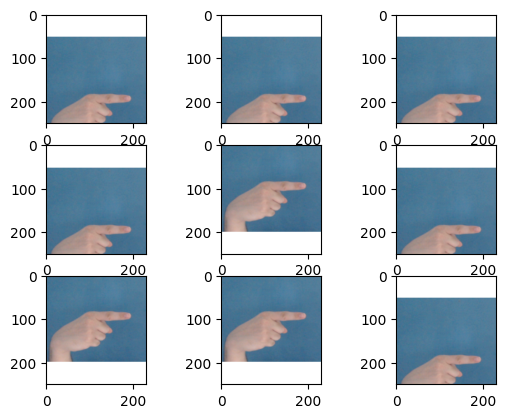

In [ ]:
# horizontal shift
img = load_img(PATH+"/G/0.png")
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-50,50])
iter = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = iter.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)

plt.show()

In [ ]:
def ho_shift(img_path):
  img = load_img(img_path)
  img_dir = os.path.dirname(img_path)
  img_name, img_extension = os.path.splitext(os.path.basename(img_path))
  data = img_to_array(img)
  samples = expand_dims(data, 0)
  datagen = ImageDataGenerator(width_shift_range=[-50,50])
  iter = datagen.flow(samples, batch_size=1)
  for i in range(9):
    batch = iter.next()
    image = batch[0].astype('uint8')
    s_name = f'{img_name}_{i}_augmented_hor.png'
    s_path = os.path.join(img_dir,s_name)
    cv2.imwrite(s_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


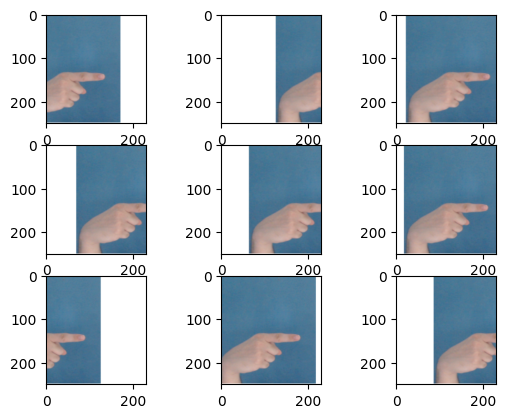

In [ ]:
# an example to see the data augmentation how it is like
# vertical shifting
img = load_img(PATH+"/G/0.png")
data = img_to_array(img)
samples = expand_dims(data,0)
datagen = ImageDataGenerator(height_shift_range=0.5)
iter = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = iter.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

In [ ]:
def vert_shift(img_path):
  img = load_img(img_path)
  img_name, img_extension = os.path.splitext(os.path.basename(img_path))
  img_dir = os.path.dirname(img_path)
  data = img_to_array(img)
  samples = expand_dims(data,0)
  datagen = ImageDataGenerator(height_shift_range=0.5)
  iter = datagen.flow(samples, batch_size=1)
  for i in range(9):
    batch = iter.next()
    image = batch[0].astype('uint8')
    s_name = f'{img_name}_{i}_augmented_vert.png'
    s_path = os.path.join(img_dir,s_name)
    cv2.imwrite(s_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

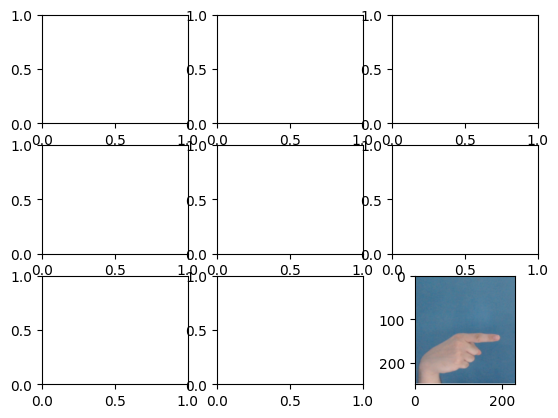

In [ ]:
## Flipping augmentation
# Horizontal
img = load_img(PATH+"/G/0.png")
data = img_to_array(img)
samples = expand_dims(data,0)
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype('uint8')
plt.imshow(image)

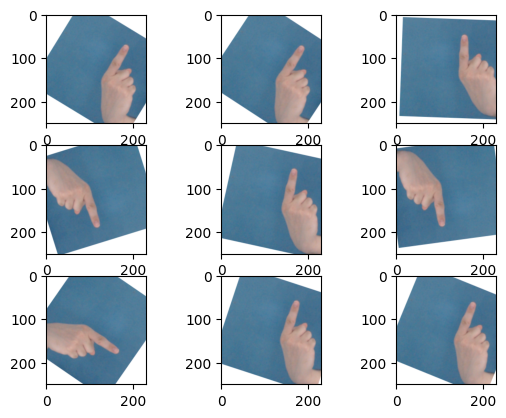

In [ ]:
img = load_img(PATH+"/G/0.png")
data = img_to_array(img)
samples = expand_dims(data,0)
datagen = ImageDataGenerator(rotation_range=90)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

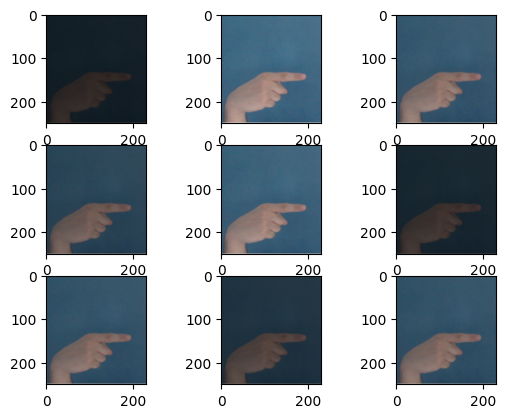

In [ ]:
# Random Brightness
img = load_img(PATH+"/G/0.png")
data = img_to_array(img)
samples = expand_dims(data,0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype("uint8")
  plt.imshow(image)
plt.show()

In [ ]:
def bright(img_path):
  img = load_img(img_path)
  img_name, img_extension = os.path.splitext(os.path.basename(img_path))
  img_dir = os.path.dirname(img_path)
  data = img_to_array(img)
  samples = expand_dims(data,0)
  datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
  iter = datagen.flow(samples, batch_size=1)
  for i in range(9):
    batch = iter.next()
    image = batch[0].astype("uint8")
    s_name = f'{img_name}_{i}_augmented_bright.png'
    s_path = os.path.join(img_dir,s_name)
    cv2.imwrite(s_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

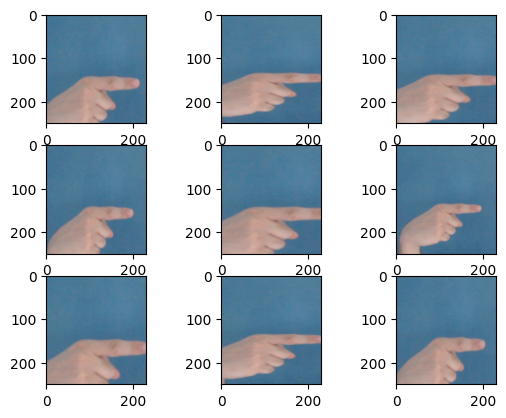

In [ ]:
# Zooming
img = load_img(PATH+"/G/0.png")
data = img_to_array(img)
samples = expand_dims(data,0)
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

In [ ]:
def zoom(img_path):
  img = load_img(img_path)
  img_name, img_extension = os.path.splitext(os.path.basename(img_path))
  img_dir = os.path.dirname(img_path)
  data = img_to_array(img)
  samples = expand_dims(data,0)
  datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
  iter = datagen.flow(samples, batch_size=1)
  for i in range(9):
    batch = iter.next()
    image = batch[0].astype('uint8')
    s_name = f'{img_name}_{i}_augmented_zoom.png'
    s_path = os.path.join(img_dir,s_name)
    cv2.imwrite(s_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

In [ ]:
# Augmentation core engine
!ls
subdirectories = [d for d in os.listdir(PATH) if os.path.isdir(os.path.join(PATH, d))]
for sd in subdirectories:
  sd_path = os.path.join(PATH, sd)
  for image_file in os.listdir(sd_path):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        image_path = os.path.join(sd_path, image_file)
        ho_shift(image_path)
        vert_shift(image_path)
        bright(image_path)
        zoom(image_path)

A  B  C  D  E  F  G  H	I  J  K  L  M  N  O  P	Q  R  S  T  U  V  W  X	Y  Z


In [ ]:
data_display_count(PATH)

Class A: 3321 items
Class B: 2997 items
Class C: 2997 items
Class D: 2997 items
Class E: 2997 items
Class F: 2997 items
Class G: 2997 items
Class H: 2997 items
Class I: 2997 items
Class J: 2997 items
Class K: 2997 items
Class L: 2997 items
Class M: 2997 items
Class N: 2997 items
Class O: 2997 items
Class P: 2997 items
Class Q: 2997 items
Class R: 2997 items
Class S: 2997 items
Class T: 2997 items
Class U: 2997 items
Class V: 2997 items
Class W: 2997 items
Class X: 2997 items
Class Y: 2997 items
Class Z: 2997 items


In [ ]:
## data framing
from PIL import Image
from tqdm import tqdm


def frame(folder_path):
  columnNames = list()
  columnNames.append('label')

  for i in range(784):
      pixel = str(i)
      columnNames.append(pixel)

  label= 0
  # subfolder
  for sbf in tqdm(sorted(os.listdir(folder_path))):
    sbf_path = os.path.join(folder_path, sbf)
    if os.path.isdir(sbf_path):
      for file in sorted(os.listdir(sbf_path)):
        # just to be sure that we don't run into a non image
        if file.lower().endswith(('.png', '.jpg', 'jpeg')):
          img_path = os.path.join(sbf_path, file)
          img = img.resize((28, 28), Image.NEAREST)
          img = Image.open(img_path)
          img.load()
          imgdata = np.asarray(img, dtype="int32")
          data = []
          #data.append()
          #data.append({'image_path': img_path, 'label':label})
          for y in range(28):
            for x in range(28):
              data.append(imgdata[x][y])
      label += 1
      # by the end label should be 25
  return pd.DataFrame(data)

In [ ]:
train_df = frame(TRAIN_PATH)
test_df = frame(TEST_PATH)
train_df.to_csv(TRAIN_CSV_PATH,index=False)
test_df.to_csv(TEST_CSV_PATH, index=False)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
def load():
  label_binarizer = LabelBinarizer()
  train_df = pd.read_csv(TRAIN_CSV_PATH)
  test_df = pd.read_csv(TEST_CSV_PATH)
  y_train = train_df['label']
  y_test = test_df['label']
  print(train_df.head(20))
  del train_df['label']
  del test_df['label']
  y_train = label_binarizer.fit_transform(y_train)
  y_test = label_binarizer.fit_transform(y_test)
  x_train = train_df.values
  x_test = test_df.values

  x_train = x_train / 255
  x_test = x_test / 255

  return x_train, y_train, x_test, y_test



In [ ]:
import tensorflow as tf
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    flipped = tf.image.flip_left_right(image)
    visualize(image, flipped)

In [ ]:
def model():
  model = Sequential()
  model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' ,
                  activation = 'relu' , input_shape = (28,28,1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' ,
                  activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 512 , activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(units = 24 , activation = 'softmax'))
  model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  return model

In [ ]:
def norm(train, test):
  return train.astype('float32') / 255.0 , test.astype('float32') / 255.0


In [ ]:
def diagnostics(history):
  # for loss
  plt.subplot(211)
  plt.title('Cross Entrop Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  ## for accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['acc'], color='blue', label='train')
  plt.plot(history.history['val_acc'], color='orange', label='test')
  plt.show()

In [ ]:
def run_engine():
  datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)
  x_train, y_train, x_test, y_test = load()
      #testX, testX = norm(trainX, testX)
  model = model()
  model.summary()
  history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))
  model.save('spanish_sign.h5')
  _, acc = model.evaluate(x_test, y_test, verbose=1)
  print('> %.3f ' % (acc * 100.0))
  diagnostics(history)